In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

/home/hwan/.local/lib/python3.9/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [15]:
dfga = pd.read_csv('gagok.csv', index_col=0, parse_dates=True)

In [16]:
dfga.head()

,level,pa,pb
t,,,
2019-12-01 00:00:00,69.600,0.0,0.0
2019-12-01 00:01:00,69.900,0.0,0.0
2019-12-01 00:02:00,69.475,0.0,0.0
2019-12-01 00:03:00,69.875,0.0,0.0
2019-12-01 00:04:00,69.900,0.0,0.0


In [17]:
dfga.drop(columns=['pa','pb'],inplace=True)

In [18]:
dfga.head()

,level
t,
2019-12-01 00:00:00,69.600
2019-12-01 00:01:00,69.900
2019-12-01 00:02:00,69.475
2019-12-01 00:03:00,69.875
2019-12-01 00:04:00,69.900


In [40]:
dfga.isnull().sum()

level    28592
dtype: int64

In [41]:
dfga1m = dfga['2020-11-01':'2020-11-30']

<AxesSubplot:xlabel='t'>

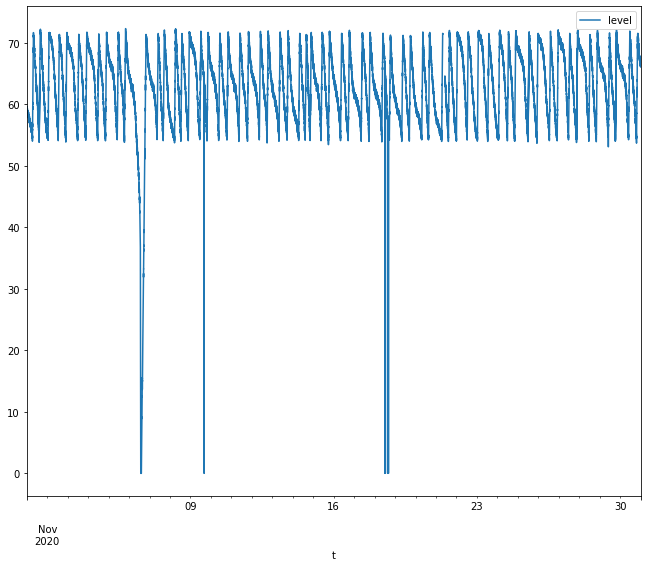

In [42]:
dfga1m.plot()

<AxesSubplot:xlabel='t'>

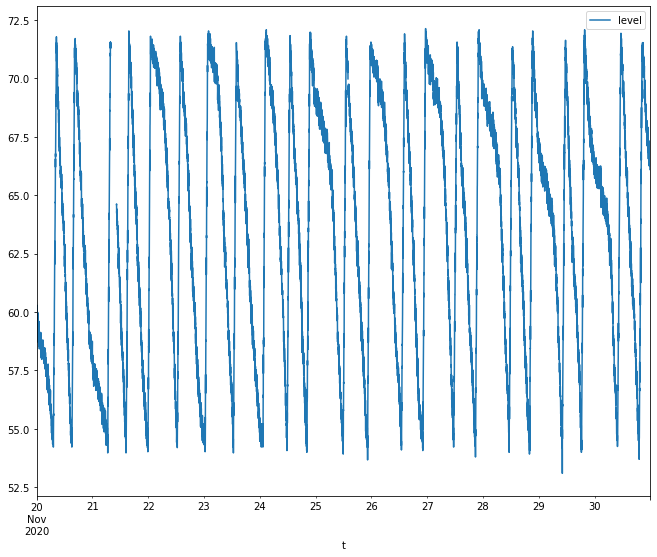

In [57]:
dfga10d = dfga['2020-11-20':'2020-11-30']
dfga10d.plot()

In [46]:
dfga10d.isnull().sum()

level    170
dtype: int64

In [47]:
f01 = dfga10d.fillna(dfga10d.bfill())
f01.isnull().sum()

level    0
dtype: int64

<AxesSubplot:xlabel='t'>

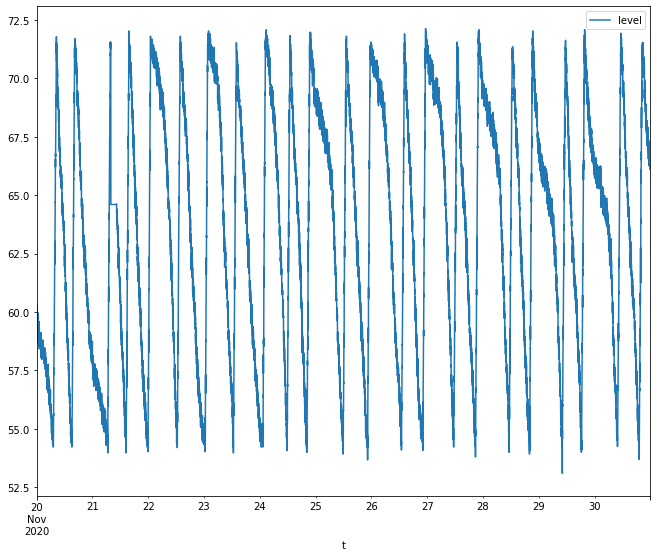

In [48]:
f01.plot()

In [49]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

decomposition = sm.tsa.seasonal_decompose(f01, model='additive')
fig = decomposition.plot()
plt.show()

ValueError: freq T not understood. Please report if you think this is in error.

In [50]:
f01.index

DatetimeIndex(['2020-11-20 00:00:00', '2020-11-20 00:01:00',
               '2020-11-20 00:02:00', '2020-11-20 00:03:00',
               '2020-11-20 00:04:00', '2020-11-20 00:05:00',
               '2020-11-20 00:06:00', '2020-11-20 00:07:00',
               '2020-11-20 00:08:00', '2020-11-20 00:09:00',
               ...
               '2020-11-30 23:50:00', '2020-11-30 23:51:00',
               '2020-11-30 23:52:00', '2020-11-30 23:53:00',
               '2020-11-30 23:54:00', '2020-11-30 23:55:00',
               '2020-11-30 23:56:00', '2020-11-30 23:57:00',
               '2020-11-30 23:58:00', '2020-11-30 23:59:00'],
              dtype='datetime64[ns]', name='t', length=15840, freq=None)

In [53]:
f02 = f01.resample('H').mean()

In [55]:
f02.index

DatetimeIndex(['2020-11-20 00:00:00', '2020-11-20 01:00:00',
               '2020-11-20 02:00:00', '2020-11-20 03:00:00',
               '2020-11-20 04:00:00', '2020-11-20 05:00:00',
               '2020-11-20 06:00:00', '2020-11-20 07:00:00',
               '2020-11-20 08:00:00', '2020-11-20 09:00:00',
               ...
               '2020-11-30 14:00:00', '2020-11-30 15:00:00',
               '2020-11-30 16:00:00', '2020-11-30 17:00:00',
               '2020-11-30 18:00:00', '2020-11-30 19:00:00',
               '2020-11-30 20:00:00', '2020-11-30 21:00:00',
               '2020-11-30 22:00:00', '2020-11-30 23:00:00'],
              dtype='datetime64[ns]', name='t', length=264, freq='H')

<AxesSubplot:xlabel='t'>

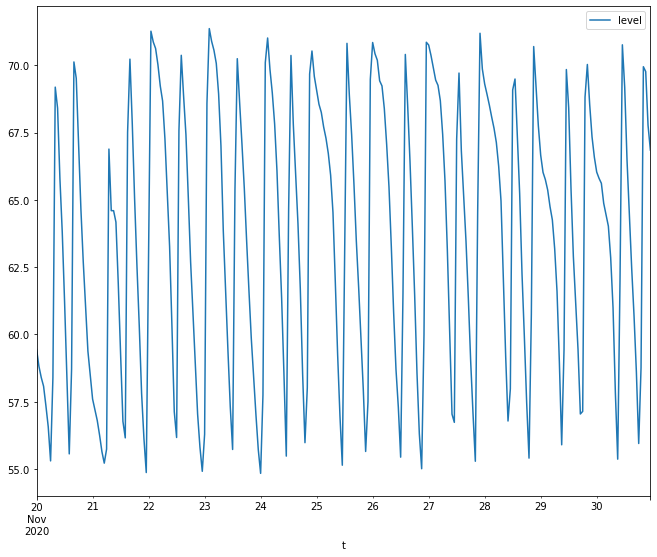

In [54]:
f02.plot()

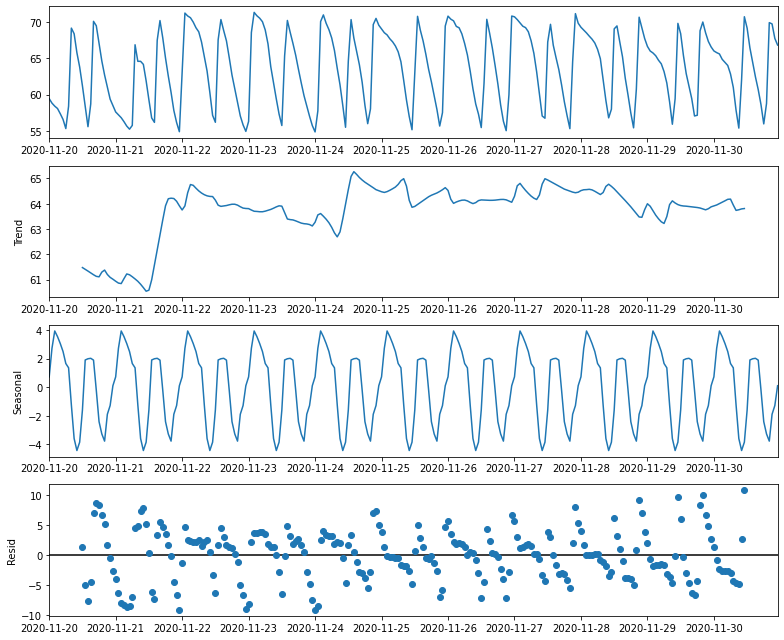

In [56]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

decomposition = sm.tsa.seasonal_decompose(f02, model='additive')
fig = decomposition.plot()
plt.show()